In [1]:
from newenv import RLIAEnv
import matplotlib.pyplot as plt
import random


env = RLIAEnv() 
rewards = 0 
episodes = 7
avg = 00
ue_loc = [15,0]

beam9stren = []
beam25stren = []
beamexhaustivestren = []

actions = ["9beam", "25beam", "exhaustive"]

Rewards = []
Episode = []

for i in range(episodes):
    prestate = env.sweep(env.codebook.keys())
    env.preid = prestate[1]
    for episode in range(10):
        action = episode
        #env.action_space.sample()
        env.observation_space, reward, done, _ = env.step(action)
        print(action)
        print("action:", actions[action])
        print("gain: ", env.state[0])
        print("reward:", reward)
        print(env.ue_loc)
        print("               ")
        print(env.preid)
        rewards += reward
        Rewards.append(reward)
        Episode.append(episode)
        env.preid = env.state[1]

#print(f'mean of rewards = {rewards/episodes}')

0
action: 9beam
gain:  50.00011065986351
reward: 29.800066395918105
[15, 1]
               
31
1
action: 25beam
gain:  49.98725942034107
reward: 29.69235565220464
[15, 2]
               
38
2
action: exhaustive
gain:  50.698255206351575
reward: 30.018953123810945
[15, 3]
               
38
3


IndexError: list index out of range

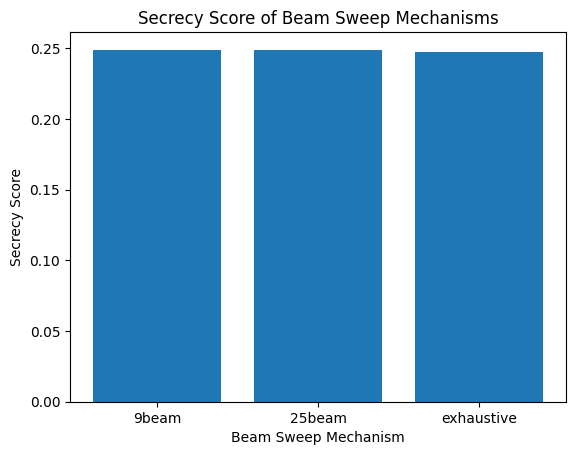

In [3]:
ninebeamsec = 0.2490673477338269
twentyfivebeamsec = 0.2489679748031178
exhaustivesec = 0.2475507006791917

#create a bar graph showing the secrecy score of each beamsweep mechanism with the secrecy score on top of each bar
plt.bar(actions, [ninebeamsec, twentyfivebeamsec, exhaustivesec])
plt.title("Secrecy Score of Beam Sweep Mechanisms")
plt.xlabel("Beam Sweep Mechanism")
plt.ylabel("Secrecy Score")
plt.show()



In [2]:
from mab import eps_bandit
n_episodes = 2000
eps=0.8
agent = eps_bandit(k=3, eps=eps, iters=n_episodes) 

actions = ["9beam", "25beam", "exhaustive"]

state = env.reset()
for i in range(n_episodes):
    action = agent.act(eps)
    env.observation_space , r, _ , _ = env.step(action)
    print("action: ", actions[action])
    #print(s1)
    #print("spec:", env.state[2])
    print("reward: ", r)
    #print("preid: ", preid)
    print("ueloc", env.ue_loc)
    print("            ")
    # Collect reward.
    agent.learn(reward=r, action=action) 


action:  exhaustive
reward:  9.824719048886552
ueloc [15, 0]
            
LEARN 0.0
mean 9.824719048886552
LEARN after 9.824719048886552 
------

EXPLOIT
action:  exhaustive
reward:  9.824719048886552
ueloc [15, 0]
            
LEARN 9.824719048886552
mean 9.824719048886552
LEARN after 9.824719048886552 
------

EXPLOIT
action:  exhaustive
reward:  9.824719048886552
ueloc [15, 0]
            
LEARN 9.824719048886552
mean 9.824719048886552
LEARN after 9.824719048886552 
------

action:  exhaustive
reward:  9.824719048886552
ueloc [15, 0]
            
LEARN 9.824719048886552
mean 9.824719048886552
LEARN after 9.824719048886552 
------

action:  9beam
reward:  10.12471730116551
ueloc [15, 0]
            
LEARN 0.0
mean 9.884718699342343
LEARN after 10.12471730116551 
------

action:  exhaustive
reward:  9.824719048886552
ueloc [15, 0]
            
LEARN 9.824719048886552
mean 9.874718757599712
LEARN after 9.824719048886552 
------

action:  25beam
reward:  9.974719048886552
ueloc [15, 0]


KeyboardInterrupt: 

In [ ]:
# Evaluation. 
rewards_list = []
for _ in range(100):
    # Estimate channel.

    action = agent.act()
    _ , r, _ , _ = env.step(action=action)
    print("action: ", actions[action])
    print("ueloc", env.ue_loc)
    rewards_list.append(r)
print(rewards_list)

EXPLOIT
action:  exhaustive
ueloc [15, 1]
EXPLOIT
action:  exhaustive
ueloc [15, 1]
EXPLOIT
action:  exhaustive
ueloc [15, 1]
EXPLOIT
action:  exhaustive
ueloc [15, 1]
EXPLOIT
action:  exhaustive
ueloc [15, 1]
EXPLOIT
action:  exhaustive
ueloc [15, 1]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 2]
EXPLOIT
action:  exhaustive
ueloc [15, 3]
EXPLOIT
action:  exhaustive
ueloc [15, 3]
EXPLOIT
action:  exhaustive
ueloc [15, 3]
EXPLOIT
action:  exhaustive
ueloc [15, 3]
EXPLOIT
action:  exhaustive
ueloc [15, 3]
EXPLOIT
action:  exhaustive
ueloc 

KeyboardInterrupt: 

In [ ]:
from contextualMab import contextual_bandit
import numpy as np


env = RLIAEnv() 
n_episodes = 2000
eps=0.9
lr= 0.15
agentContextual = contextual_bandit(k=3, eps=eps, iters=n_episodes, hidden_size=32, 
    state_size=4, learning_rate=lr) 

actions = ["9beam", "25beam", "exhaustive"]

env.state = env.reset()
for j in range(n_episodes): 
    print("user location:" , env.ue_loc)
    flat_state = np.array(env.state, dtype= float)
    print("flat_state", flat_state)
    #print('flat_state',flat_state.shape, type(flat_state))
    action = agentContextual.act(flat_state, eps)
    print("action: ", actions[action])
    _ , r, _ , _ = env.step(action)
    # Collect reward.
    agentContextual.learn(reward=r, state=flat_state, action=action)


/home/adrian/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


user location: [15, 0]
flat_state [26.06179974  2.          0.         15.        ]
action:  exhaustive


UnboundLocalError: local variable 'yhat' referenced before assignment

In [ ]:
print(agentContextual.neuralNet.state_dict)